# For Excel Dataset

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_excel('hungarian heart disease.xlsx', na_values="?")

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

frequency_density = data.apply(pd.value_counts)

C:\Users\Musti Tanvir\AppData\Local\Temp\ipykernel_24180\3664507346.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequency_density = data.apply(pd.value_counts)


In [7]:
# Identify outliers and create a mask for them
outliers_mask = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

In [8]:
# Drop outliers from the data
data_no_outliers = data[~outliers_mask.any(axis=1)]

In [9]:
# Calculate descriptive statistics
descriptive_stats = data_no_outliers.describe()

In [10]:
# Now replace missing values, using medians or modes calculated without outliers
for column in data_no_outliers.columns:
    if data_no_outliers[column].dtype == 'object':  # Categorical data
        mode_no_outliers = data_no_outliers[column].mode()[0]
        data[column].fillna(mode_no_outliers, inplace=True)
    else:  # Numerical data
        median_no_outliers = data_no_outliers[column].median()
        data[column].fillna(median_no_outliers, inplace=True)

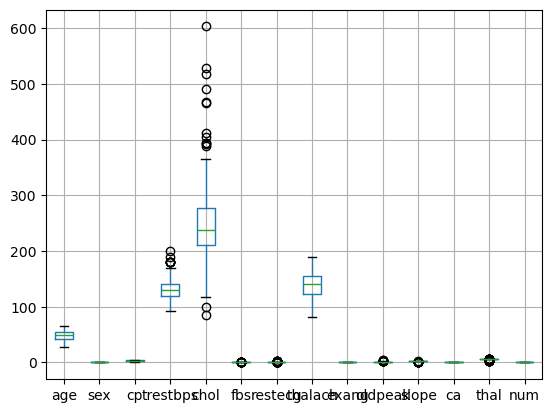

In [11]:
import matplotlib.pyplot as plt
data.boxplot()
plt.show()

In [42]:
%pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xlsxlwriter (from versions: none)
ERROR: No matching distribution found for xlsxlwriter


In [15]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('hungarian heart disease cleaned.xlsx', engine='xlsxwriter')

# Shorten the sheet name to comply with Excel's limit
descriptive_stats_sheet_name = 'Stats Wo Outliers'
outliers_mask_sheet_name = 'Outliers Mask'

# Write each DataFrame to a different worksheet using the new, shorter sheet names
data.to_excel(writer, sheet_name='Cleaned Data', index=False)
descriptive_stats.to_excel(writer, sheet_name=descriptive_stats_sheet_name)
outliers_mask.to_excel(writer, sheet_name=outliers_mask_sheet_name)

# Save and close the Pandas Excel writer to output the Excel file
writer.close()


# For CSV

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter

In [44]:
# Load the dataset from CSV
data = pd.read_csv('Placement_Data_Full_Class.csv')

# Display basic information to confirm loading and initial data state
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [45]:
# Identify and remove outliers for numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

In [46]:
# Calculate Q1, Q3, and IQR for numeric columns
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [47]:
# Define a mask for outliers
outliers_mask = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))

# Remove outliers
data_no_outliers = data[~(outliers_mask.any(axis=1))]

In [48]:
# Ensure missing values are replaced
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical data
        mode = data_no_outliers[column].dropna().mode()[0]
        data[column].fillna(mode, inplace=True)
    else:  # Numerical data, ensure no NaN values before replacing
        if data[column].isnull().any():
            median = data_no_outliers[column].dropna().median()
            data[column].fillna(median, inplace=True)

In [49]:
# Now that we've cleaned the data, we can save it to a new CSV file
data.to_csv('Placement_Data_Full_Class_cleaned.csv', index=False)

In [50]:
# save the descriptive statistics to a separate CSV file
descriptive_stats_no_outliers = data_no_outliers.describe()
descriptive_stats_no_outliers.to_csv('descriptive_stats_no_outliers.csv')

In [51]:
# Create a new Excel file and add a worksheet with the xlsxwriter library
workbook = xlsxwriter.Workbook('Placement_Data_Full_Class_boxplot.xlsx', {'nan_inf_to_errors': True})
worksheet = workbook.add_worksheet()

In [56]:
# Write numeric data without outliers to the worksheet, replacing NaN values first
for row_num, row in enumerate(data_no_outliers[numeric_columns].fillna(0).values):  # Replace NaN with zero for Excel
    worksheet.write_row(row_num, 0, row)

In [57]:
# Close the workbook to save it
workbook.close()

C:\Users\Musti Tanvir\AppData\Roaming\Python\Python39\site-packages\xlsxwriter\workbook.py:369: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


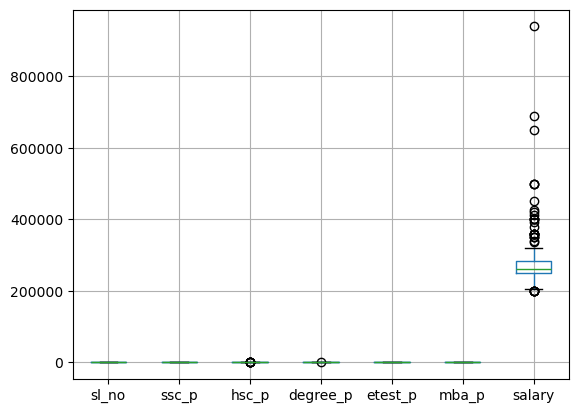

In [54]:
# Plotting the boxplot for numeric columns only
data[numeric_columns].boxplot()
plt.show()